## Read file

In [1]:
doc = open('Mark.txt')
doc = doc.read()

## Clean Text

In [2]:
from string import punctuation
txt = ''.join(c for c in doc if not c.isdigit())
txt = ''.join(c for c in txt if c not in punctuation)
marktxt = ''.join(c for c in txt if c not in ['”','“','’','‘', '——', '—']).lower()

In [3]:
print(marktxt)

    the beginning of the good news about jesus christ the son of god  just as it is written in isaiah the prophet look i am sending my messenger ahead of you who will prepare your way  a voice of one crying out in the wilderness prepare the way of jehovah make his roads straight  john the baptizer was in the wilderness preaching baptism in symbol of repentance for forgiveness of sins  and all the territory of judea and all the inhabitants of jerusalem were going out to him and they were baptized by him in the jordan river openly confessing their sins  now john wore clothing of camels hair and a leather belt around his waist and he ate locusts and wild honey  and he was preaching someone stronger than i am is coming after me the lace of whose sandals i am not worthy to stoop down and untie  i baptized you with water but he will baptize you with holy spirit
      in the course of those days jesus came from nazareth of galilee and was baptized in the jordan by john  and immediately on com

## Get word count

In [4]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.probability import FreqDist

# Tokenize text into individual words
words = nltk.tokenize.word_tokenize(marktxt)
freqdis = FreqDist(words)
count_frame = pd.DataFrame(freqdis, index = [0]).T
count_frame.columns = ['Counts'] 
print(count_frame)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
             Counts
a               194
abandoned         2
abated            2
abba              1
abiathar          1
able             10
aboard            2
about            34
above             2
abraham           1
abroad            2
absolutely        1
abusively         2
accept            1
accompany         2
according         1
account           6
accuse            1
accusing          1
accustomed        1
across            3
acts              2
added             2
adulterous        1
adultery          4
afraid            3
after            40
afternoon         1
again            29
against          21
...             ...
wonders           1
word             13
words             4
wore              1
work              3
works             2
world             2
worse             2
worshipping       1
worth             2
worthy  

# Plot distribution as pareto chart

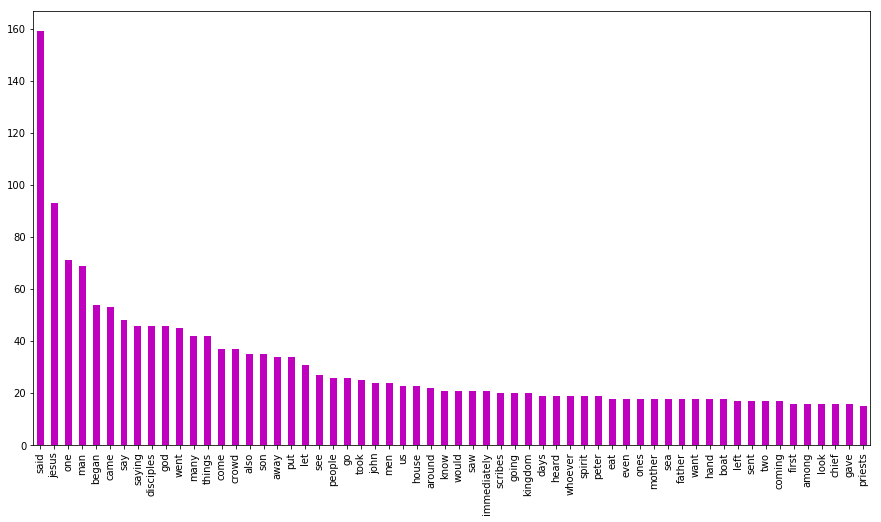

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,8))
ax = fig.gca()
counts = count_frame.sort_values('Counts', ascending = False)
counts.Counts[:60].plot(kind = 'bar', ax = ax, color = 'm')
plt.show()

# Remove stopwords

In [6]:
# Get stopwords from nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# filter out the stopwords
marktxt = ' '.join(c for c in marktxt.split() if c not in stopwords.words('english'))

In [8]:
print(marktxt)

beginning good news jesus christ son god written isaiah prophet look sending messenger ahead prepare way voice one crying wilderness prepare way jehovah make roads straight john baptizer wilderness preaching baptism symbol repentance forgiveness sins territory judea inhabitants jerusalem going baptized jordan river openly confessing sins john wore clothing camels hair leather belt around waist ate locusts wild honey preaching someone stronger coming lace whose sandals worthy stoop untie baptized water baptize holy spirit course days jesus came nazareth galilee baptized jordan john immediately coming water saw heavens parted like dove spirit coming upon voice came heavens son beloved approved immediately spirit impelled go wilderness continued wilderness days tempted satan wild beasts angels ministering john arrested jesus went galilee preaching good news god saying appointed time fulfilled kingdom god drawn near repent faith good news walking alongside sea galilee saw simon simons brot

## Get word counts

In [9]:
# Tokenize words
words = nltk.tokenize.word_tokenize(marktxt)

# Get frequency distribution of words into a dataframe
from nltk.probability import FreqDist
freqdis = FreqDist(words)
count_frame = pd.DataFrame(freqdis, index = [0]).T
count_frame.columns = ['Counts']

## Plot frequency distribution of top 60 words in Mark

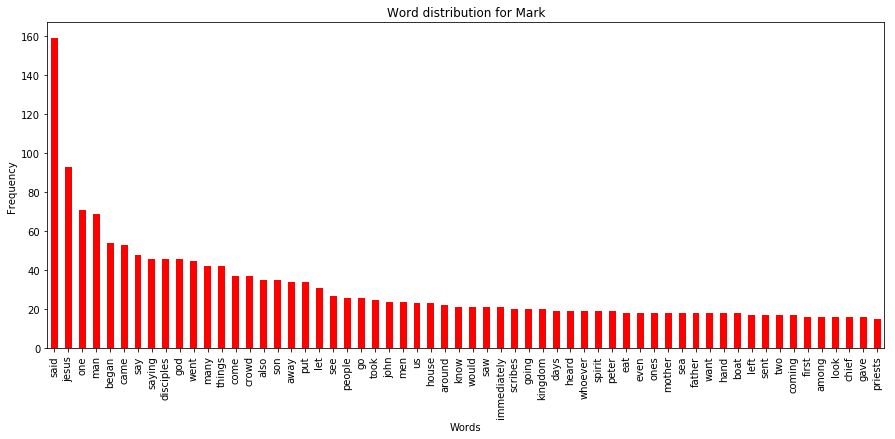

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(15,6))
ax = fig.gca()
counts = count_frame.sort_values('Counts', ascending = False)
counts.Counts[:60].plot(kind = 'bar', ax = ax, color = 'r')
ax.set_title('Word distribution for Mark')
ax.set_ylabel('Frequency')
ax.set_xlabel('Words')
plt.show()

The corpus for this project is taken from the 2013 edition of " [New World Translation of the Holy Scriptures](https://www.jw.org/en/publications/bible/study-bible/books/mark/) "